In [2]:
import yfinance as yf
import pandas as pd
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
tesla_data.reset_index(inplace=True)
tesla_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [16]:
from bs4 import BeautifulSoup
import requests
url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

tables = soup.find_all('table')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
tesla_revenue.tail()


,Date,Revenue


In [11]:
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')
gme_data.reset_index(inplace=True)
gme_data.head()


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5.5175,5.7375,5.5000,5.7250,3.854644,26702800
1,2010-01-05,5.7275,5.9350,5.7250,5.8800,3.959006,21269600
2,2010-01-06,5.8650,6.0250,5.8050,6.0075,4.044851,21471200
3,2010-01-07,5.0025,5.2925,4.8550,5.1150,3.443930,164761200
4,2010-01-08,5.1600,5.3075,5.0575,5.0725,3.415315,47872400


In [18]:
url = 'https://finance.yahoo.com/quote/GME/financials?p=GME'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

# Example code to extract revenue data
# This needs to be adjusted based on the actual structure of the webpage
tables = soup.find_all('table')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
gme_revenue.tail()


,Date,Revenue


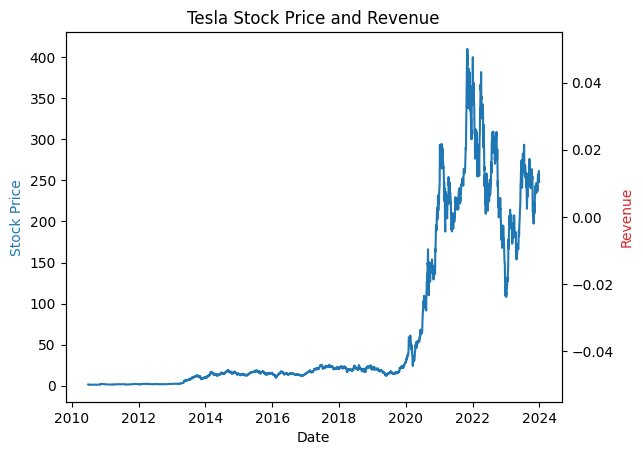

In [19]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_title):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red')

    plt.title(stock_title)
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price and Revenue')


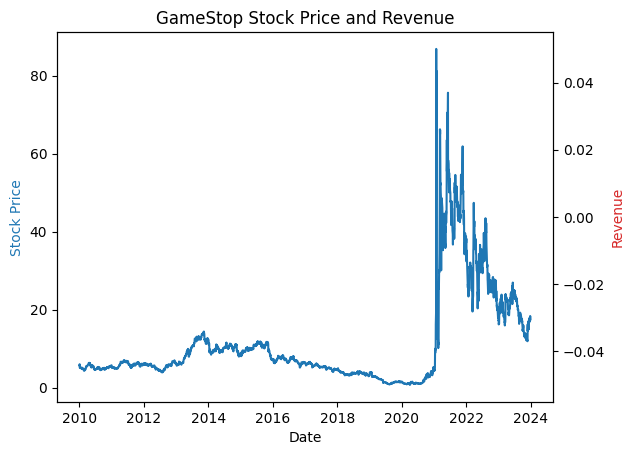

In [20]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Price and Revenue')
